<a href="https://colab.research.google.com/github/yuju1998/A-Search-520/blob/main/Voyage_to_the_Unknown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import github2pypi
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
#!git clone https://github.com/PietropaoloV/A-Search-520.git
#%ls
#%pwd

In [3]:
path = "./A-Search-520/Data"
files = os.listdir(path)
files.sort()
del files[0]
print(files[0:4])

['Q4-AStar-Manhattan-NoBumps-Results.csv', 'Q5-AStar-Chebyshev-NoBumps-Results.csv', 'Q5-AStar-Euclidean-NoBumps-Results.csv', 'Q5-AStar-Manhattan-NoBumps-Results.csv']


# Question 4

In [4]:
q4 = pd.read_csv(path + "/" + files[0])

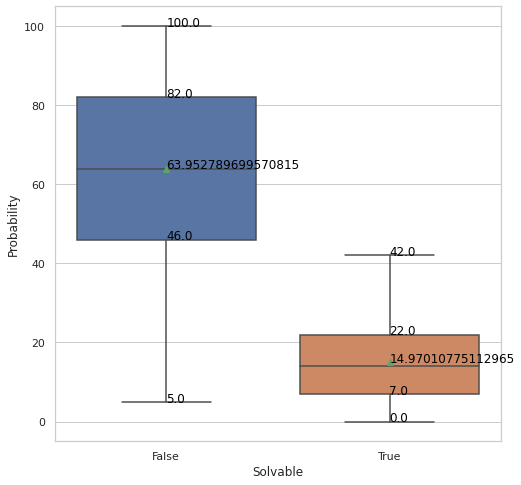

In [5]:
# Plot for Question 4
plt.figure(figsize = (8, 8))
q4_box = sns.boxplot(x=q4['Solvable'], y=q4['Probability'], showmeans=True)
q4_mean = q4.groupby(['Solvable'])['Probability'].mean()
q4_summary = q4.groupby(['Solvable'])['Probability'].quantile([0,0.25,0.5,0.75,1])

#print(q4_mean, q4_summary)

for xtick in q4_box.get_xticks():
   q4_box.text(xtick, q4_summary[xtick][0], str(q4_summary[xtick][0]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][0.25], str(q4_summary[xtick][0.25]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][0.75], str(q4_summary[xtick][0.75]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][1], str(q4_summary[xtick][1]), size='large', color='black')
   q4_box.text(xtick, q4_mean[xtick], str(q4_mean[xtick]), size='large', color='black')



# Question 5

In [6]:
q5_c = pd.read_csv(path + "/" + files[1])
q5_e = pd.read_csv(path + "/" + files[2])
q5_m = pd.read_csv(path + "/" + files[3])

> A star

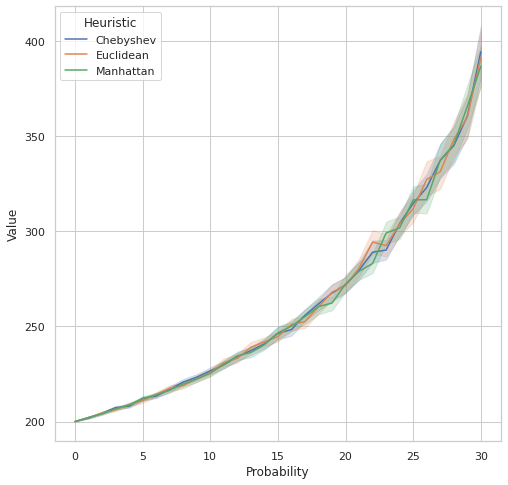

In [7]:
q5_astar = pd.concat([q5_c['Probability'], q5_c['Path Length (Repeated A*'].rename('Chebyshev'), q5_e['Path Length (Repeated A*'].rename('Euclidean'), q5_m['Path Length (Repeated A*'].rename('Manhattan')], axis=1)
q5_astar = q5_astar.melt('Probability', var_name='Heuristic', value_name='Value')
#print(q5_astar)
plt.figure(figsize=(8, 8))
q5_astar_line = sns.lineplot(x=q5_astar['Probability'], y=q5_astar['Value'], hue=q5_astar['Heuristic'])


> Number of Cells Processed

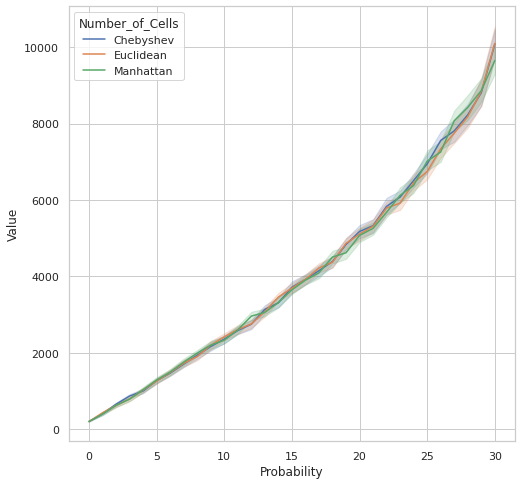

In [8]:
q5_cells = pd.concat([q5_c['Probability'], q5_c['Number of Cells Processed'].rename('Chebyshev'), q5_e['Number of Cells Processed'].rename('Euclidean'), q5_m['Number of Cells Processed'].rename('Manhattan')], axis=1)
q5_cells = q5_cells.melt('Probability', var_name='Number_of_Cells', value_name='Value')
#print(q5_cells)
plt.figure(figsize=(8, 8))
q5_cells_line = sns.lineplot(x=q5_cells['Probability'], y=q5_cells['Value'], hue=q5_cells['Number_of_Cells'])


> Runtime

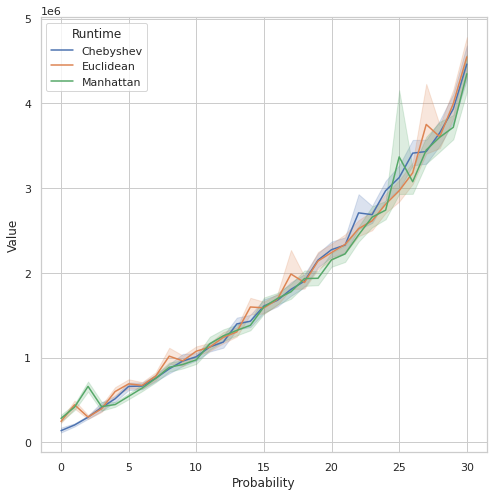

In [9]:
q5_time = pd.concat([q5_c['Probability'], q5_c['Runtime'].rename('Chebyshev'), q5_e['Runtime'].rename('Euclidean'), q5_m['Runtime'].rename('Manhattan')], axis=1)
q5_time = q5_time.melt('Probability', var_name='Runtime', value_name='Value')
#print(q5_time)
plt.figure(figsize=(8, 8))
q5_time_line = sns.lineplot(x=q5_time['Probability'], y=q5_time['Value'], hue=q5_time['Runtime'])

# Question 6

In [10]:
q6 = pd.read_csv(path + "/" + files[6])
q6_dt = pd.concat([q6['Probability'], q6['Path Length (Repeated A*'].rename('Trajectory'), q6['Path Length (Discovered)'].rename('Discovered'), q6['Path Length (Complete)'].rename('Full'), q6['Number of Cells Processed'].rename("Number_of_Cells")], axis=1)

> Density vs Average Trajectory Length

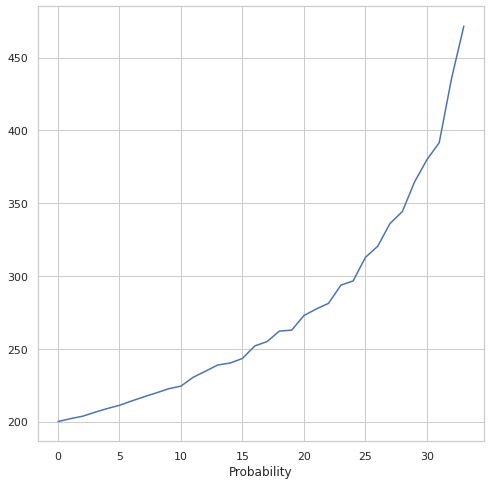

In [11]:
q6_1_mean = q6_dt.groupby(['Probability'])['Trajectory'].mean()
plt.figure(figsize=(8, 8))
q6_1_line = sns.lineplot(data=q6_1_mean, x='Probability', y=q6_1_mean.values)


> Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld)

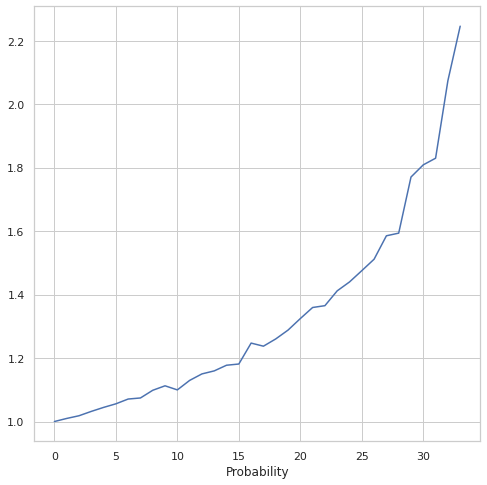

In [12]:
q6_2 = pd.concat([q6['Probability'], q6['Path Length (Repeated A*'].rename('Trajectory')], axis=1)
q6_2_shortest = q6_dt.groupby(['Probability'])['Discovered'].quantile([0])
q6_2_mean = q6_2.groupby(['Probability'])['Trajectory'].mean()
#print(q6_2_mean, q6_2_shortest.values, q6_2_mean/q6_2_shortest.values)
plt.figure(figsize=(8, 8))
q6_2_line = sns.lineplot(data=q6_2_mean, x='Probability', y=q6_2_mean.values/q6_2_shortest.values)

> Density vs Average (Length of Shortest Path in Final Discovered Gridworld / Length of ShortestPath in Full Gridworld)


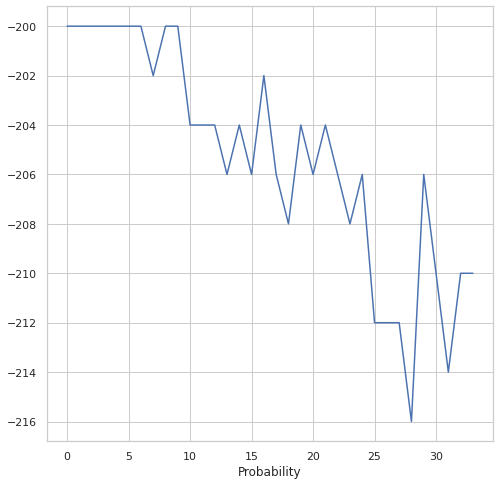

In [14]:
q6_3_shortest_d = q6_dt.groupby(['Probability'])['Discovered'].quantile([0])
q6_3_shortest_f = q6_dt.groupby(['Probability'])['Full'].quantile([0])
#print(q6_3_shortest_d.values, '\n', q6_3_shortest_f.values, '\n', )
plt.figure(figsize=(8, 8))
q6_3_line = sns.lineplot(data=q6_3_shortest_d, x='Probability', y=q6_3_shortest_d.values/q6_3_shortest_f.values)



> Density vs Average Number of Cells Processed by Repeated A*




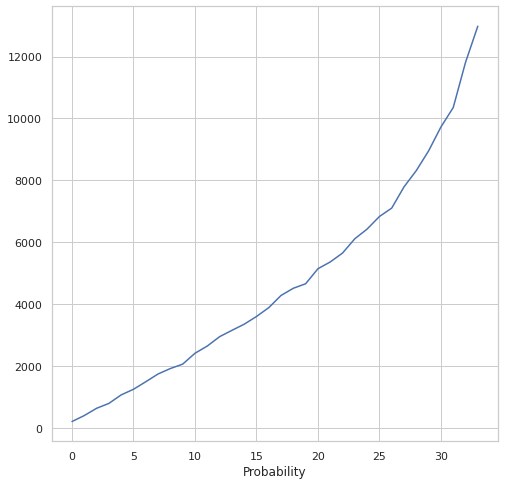

In [15]:
q6_4_mean = q6_dt.groupby(['Probability'])['Number_of_Cells'].mean()
plt.figure(figsize=(8, 8))
q6_4_line = sns.lineplot(data=q6_4_mean, x='Probability', y=q6_4_mean.values)


# Question 7

In [16]:
q7 = pd.read_csv(path + "/" + files[10])
q7_dt = pd.concat([q7['Probability'], q7['Path Length (Repeated A*'].rename('Trajectory'), q7['Path Length (Discovered)'].rename('Discovered'), q7['Path Length (Complete)'].rename('Full'), q7['Number of Cells Processed'].rename("Number_of_Cells")], axis=1)

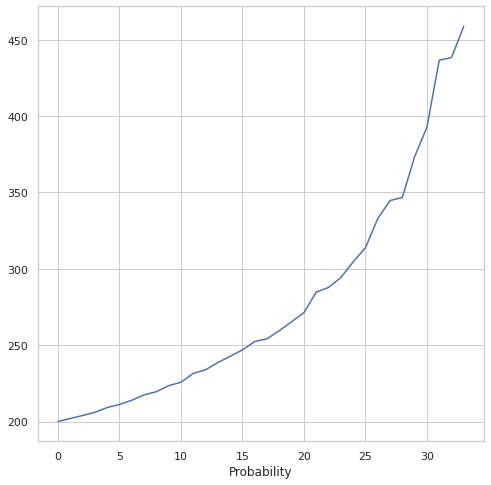

In [17]:
q7_1_mean = q7_dt.groupby(['Probability'])['Trajectory'].mean()
plt.figure(figsize=(8, 8))
q7_1_line = sns.lineplot(data=q7_1_mean, x='Probability', y=q7_1_mean.values)

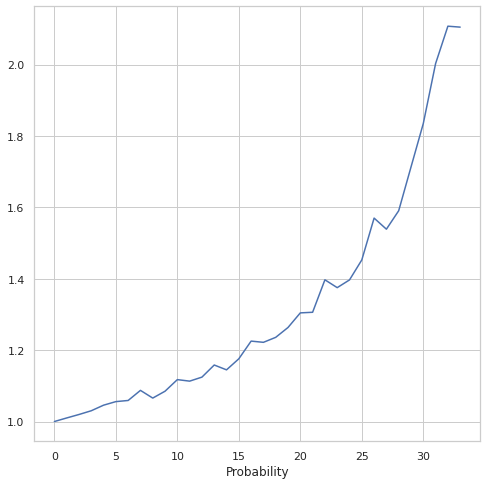

In [18]:
q7_2 = pd.concat([q7['Probability'], q7['Path Length (Repeated A*'].rename('Trajectory')], axis=1)
q7_2_shortest = q7_dt.groupby(['Probability'])['Discovered'].quantile([0])
q7_2_mean = q7_2.groupby(['Probability'])['Trajectory'].mean()
#print(q7_2_mean, q7_2_shortest.values, q7_2_mean/q7_2_shortest.values)
plt.figure(figsize=(8, 8))
q7_2_line = sns.lineplot(data=q7_2_mean, x='Probability', y=q7_2_mean.values/q7_2_shortest.values)

[200. 200. 200. 200. 200. 200. 202. 200. 206. 206. 202. 208. 208. 206.
 212. 210. 206. 208. 210. 210. 208. 218. 206. 214. 218. 216. 212. 224.
 218. 218. 214. 218. 208. 218.] 
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] 



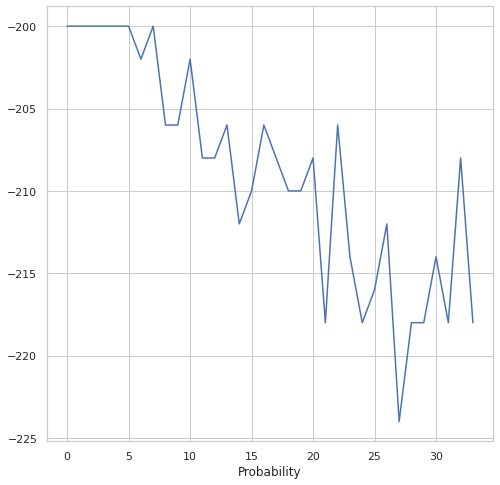

In [19]:
q7_3_shortest_d = q7_dt.groupby(['Probability'])['Discovered'].quantile([0])
q7_3_shortest_f = q7_dt.groupby(['Probability'])['Full'].quantile([0])
print(q7_3_shortest_d.values, '\n', q7_3_shortest_f.values, '\n', )
plt.figure(figsize=(8, 8))
q7_3_line = sns.lineplot(data=q7_3_shortest_d, x='Probability', y=q7_3_shortest_d.values/q7_3_shortest_f.values)

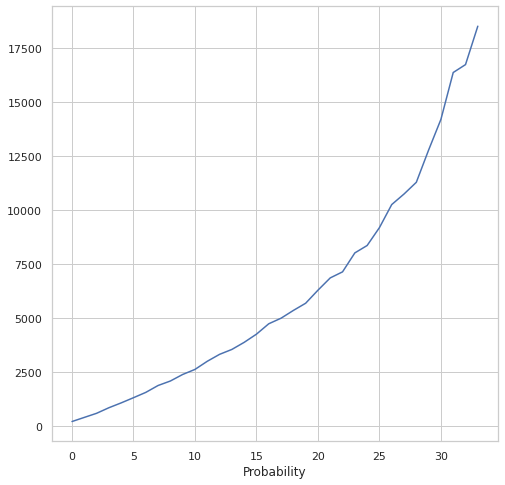

In [20]:
q7_4_mean = q7_dt.groupby(['Probability'])['Number_of_Cells'].mean()
plt.figure(figsize=(8, 8))
q7_4_line = sns.lineplot(data=q7_4_mean, x='Probability', y=q7_4_mean.values)

# Question 8

In [21]:
q8_dt_ls = []
for i in range(12,22):
  q8_dt_ls.append(pd.read_csv(path + "/" + files[i]))
q8_dist = ['1', '11', '16', '21', '26', '31', '36', '41', '46', '51']
for i in range(len(q8_dt_ls)):
  q8_dt_ls[i] = pd.concat([
               q8_dt_ls[i]['Probability'],
               q8_dt_ls[i]['Path Length (Repeated A*'].rename('Trajectory'),
               q8_dt_ls[i]['Runtime'], 
               q8_dt_ls[i]['Number of Cells Processed'].rename("Number_of_Cells")
               ], axis=1)
  q8_dt_ls[i]['Dist'] = q8_dist[i]
print(q8_dt_ls[3].head)

<bound method NDFrame.head of       Probability  Trajectory  Runtime  Number_of_Cells Dist
0             0.0       200.0   132300              201   21
1             0.0       200.0   174200              201   21
2             0.0       200.0   203100              201   21
3             0.0       200.0   196000              201   21
4             0.0       200.0   198200              201   21
...           ...         ...      ...              ...  ...
2095         20.0       616.0  4616700             5624   21
2096         20.0       709.0  3494700             6351   21
2097         20.0       853.0  3235000             7076   21
2098         20.0       778.0  3409500             5948   21
2099         20.0       925.0  6383900             8579   21

[2100 rows x 5 columns]>


In [23]:
q8_trty = pd.concat([
           q8_dt_ls[0]['Probability'], 
           q8_dt_ls[0]['Trajectory'].rename('Distance='+q8_dist[0]), 
           q8_dt_ls[1]['Trajectory'].rename('Distance='+q8_dist[1]), 
           q8_dt_ls[2]['Trajectory'].rename('Distance='+q8_dist[2]), 
           q8_dt_ls[3]['Trajectory'].rename('Distance='+q8_dist[3]), 
           q8_dt_ls[4]['Trajectory'].rename('Distance='+q8_dist[4]), 
           q8_dt_ls[5]['Trajectory'].rename('Distance='+q8_dist[5]), 
           q8_dt_ls[6]['Trajectory'].rename('Distance='+q8_dist[6]), 
           q8_dt_ls[7]['Trajectory'].rename('Distance='+q8_dist[7]), 
           q8_dt_ls[8]['Trajectory'].rename('Distance='+q8_dist[8]), 
           q8_dt_ls[9]['Trajectory'].rename('Distance='+q8_dist[9])
           ], axis=1)
q8_trty = q8_trty.melt('Probability', var_name='Distance', value_name='Trajectory')
#print(q8_trty.head())



> Trajectory



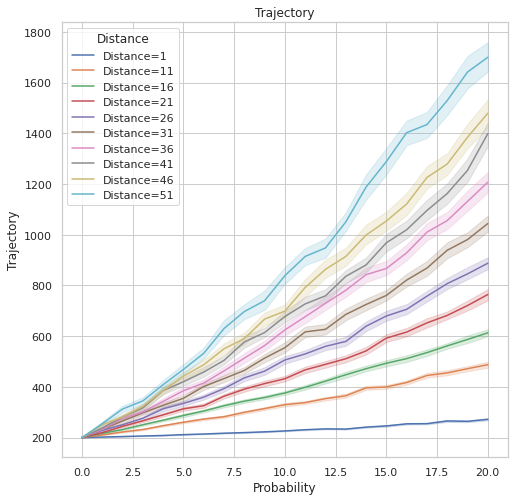

In [24]:
plt.figure(figsize=(8, 8))
plt.title("Trajectory")
q8_trty_line = sns.lineplot(x=q8_trty['Probability'], y=q8_trty['Trajectory'], hue=q8_trty['Distance'])


In [25]:
q8_rntm = pd.concat([
           q8_dt_ls[0]['Probability'], 
           q8_dt_ls[0]['Runtime'].rename('Distance='+q8_dist[0]), 
           q8_dt_ls[1]['Runtime'].rename('Distance='+q8_dist[1]), 
           q8_dt_ls[2]['Runtime'].rename('Distance='+q8_dist[2]), 
           q8_dt_ls[3]['Runtime'].rename('Distance='+q8_dist[3]), 
           q8_dt_ls[4]['Runtime'].rename('Distance='+q8_dist[4]), 
           q8_dt_ls[5]['Runtime'].rename('Distance='+q8_dist[5]), 
           q8_dt_ls[6]['Runtime'].rename('Distance='+q8_dist[6]), 
           q8_dt_ls[7]['Runtime'].rename('Distance='+q8_dist[7]), 
           q8_dt_ls[8]['Runtime'].rename('Distance='+q8_dist[8]), 
           q8_dt_ls[9]['Runtime'].rename('Distance='+q8_dist[9])
           ], axis=1)
q8_rntm = q8_rntm.melt('Probability', var_name='Distance', value_name='Runtime')
#print(q8_rntm.head())



> Runtime


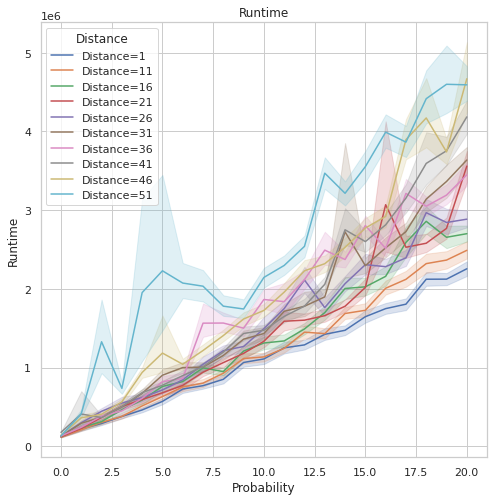

In [26]:
plt.figure(figsize=(8, 8))
plt.title("Runtime")
q8_rntm_line = sns.lineplot(x=q8_rntm['Probability'], y=q8_rntm['Runtime'], hue=q8_rntm['Distance'])


In [27]:
q8_cells = pd.concat([
           q8_dt_ls[0]['Probability'], 
           q8_dt_ls[0]['Number_of_Cells'].rename('Distance='+q8_dist[0]), 
           q8_dt_ls[1]['Number_of_Cells'].rename('Distance='+q8_dist[1]), 
           q8_dt_ls[2]['Number_of_Cells'].rename('Distance='+q8_dist[2]), 
           q8_dt_ls[3]['Number_of_Cells'].rename('Distance='+q8_dist[3]), 
           q8_dt_ls[4]['Number_of_Cells'].rename('Distance='+q8_dist[4]), 
           q8_dt_ls[5]['Number_of_Cells'].rename('Distance='+q8_dist[5]), 
           q8_dt_ls[6]['Number_of_Cells'].rename('Distance='+q8_dist[6]), 
           q8_dt_ls[7]['Number_of_Cells'].rename('Distance='+q8_dist[7]), 
           q8_dt_ls[8]['Number_of_Cells'].rename('Distance='+q8_dist[8]), 
           q8_dt_ls[9]['Number_of_Cells'].rename('Distance='+q8_dist[9])
           ], axis=1)
q8_cells = q8_cells.melt('Probability', var_name='Distance', value_name='Number_of_Cells')
print(q8_cells.head())

   Probability    Distance  Number_of_Cells
0          0.0  Distance=1              201
1          0.0  Distance=1              201
2          0.0  Distance=1              201
3          0.0  Distance=1              201
4          0.0  Distance=1              201




> Number of Cells Processed


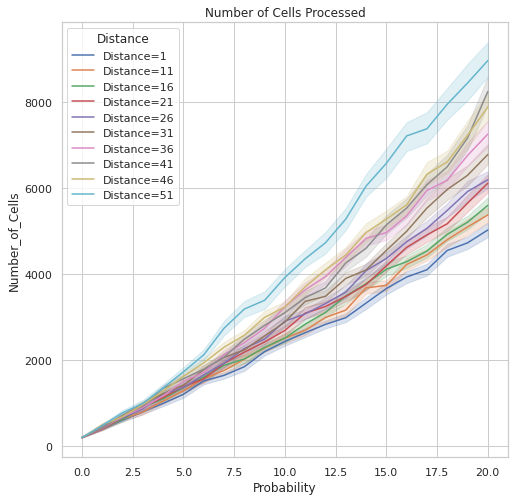

In [28]:
plt.figure(figsize=(8, 8))
plt.title("Number of Cells Processed")
q8_cells_line = sns.lineplot(x=q8_cells['Probability'], y=q8_cells['Number_of_Cells'], hue=q8_cells['Distance'])
